In [1]:
import numpy as np
from SimPEG import Maps, Mesh
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from matplotlib import rcParams
rcParams['font.size'] = 12

In [2]:
def step(slope, tau):
    return np.arctan(slope * tau)/np.pi + 0.5

In [34]:
tau = np.linspace(-10, 10, 400)
slopes = np.logspace(-1, 2, 4)

In [35]:
a

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

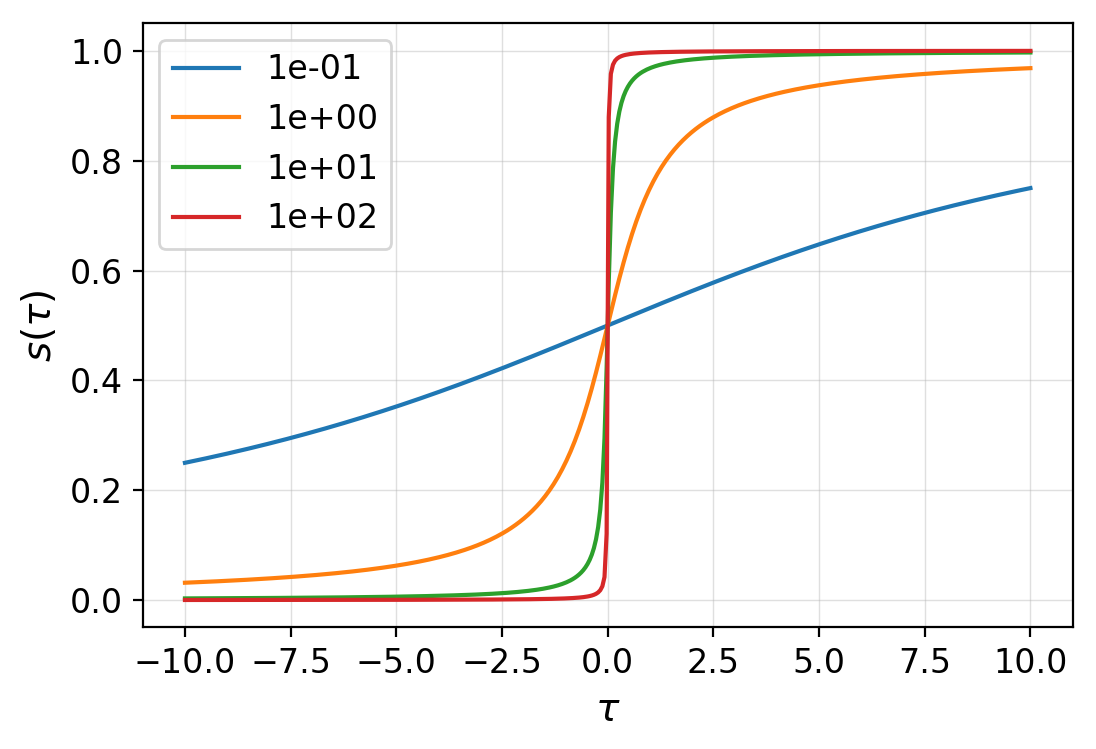

In [38]:
fig, ax = plt.subplots(1, 1, dpi=200)
[ax.plot(tau, step(a, tau), label="{:1.0e}".format(a)) for a in slopes]

ax.grid(which="both", alpha=0.4, lw=0.5)
ax.set_xlabel('$\\tau$', fontsize=14)
ax.set_ylabel('$s(\\tau)$', fontsize=14)

ax.legend()
fig.savefig("../figures/approx_step", bbox_inches="tight")

In [2]:
mesh = Mesh.TensorMesh([[(0.5, 200)], [(0.5, 200)]], x0="CC")

In [3]:
m = np.r_[0, 10, 0, 20, 0, 10]

In [16]:
block = Maps.ParametricBlock(mesh, slopeFact=1e10, p=1) # epsilon=1e-4) #slope=1e-2)

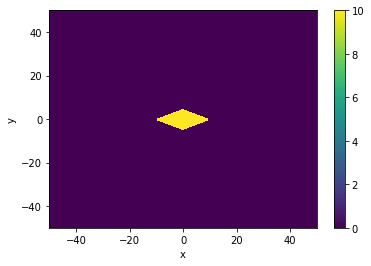

In [17]:
plt.colorbar(mesh.plotImage(block*m)[0])

In [6]:
block.test(m=m, dx=0.5*np.r_[5, 6, 5, 6, 1, 2])

Testing ParametricBlock(40000,6)
==================== checkDerivative ====================
iter    h         |ft-f0|   |ft-f0-h*J0*dx|  Order
---------------------------------------------------------
 0   1.00e-01    6.797e+01     4.494e+01      nan
 1   1.00e-02    1.497e+01     1.415e+01      0.502
 2   1.00e-03    5.021e-01     1.990e-08      8.852
 3   1.00e-04    5.021e-02     3.069e-10      1.812
========================= PASS! =========================
You get a gold star!



True

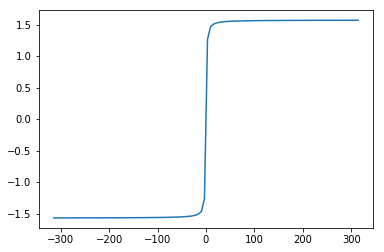

In [7]:
extent = 100
x = np.linspace(-extent*np.pi, extent*np.pi, 100)
plt.plot(x, np.arctan(x))

In [8]:
ellipsoid = Maps.ParametricEllipsoid(mesh, slope=1e1)

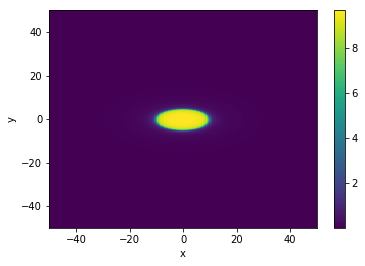

In [9]:
plt.colorbar(mesh.plotImage(ellipsoid * m)[0])

In [10]:
ellipsoid.mDict(np.r_[0, 1, 0, 20, 0, 10])

{'dx': 20, 'dy': 10, 'val_background': 0, 'val_block': 1, 'x0': 0, 'y0': 0}

In [11]:
ellipsoid.test(m=m, dx=np.r_[5, 6, 5, 6, 1, 2])

Testing ParametricEllipsoid(40000,6)
==================== checkDerivative ====================
iter    h         |ft-f0|   |ft-f0-h*J0*dx|  Order
---------------------------------------------------------
 0   1.00e-01    1.060e+02     1.216e+01      nan
 1   1.00e-02    1.062e+01     1.456e-01      1.922
 2   1.00e-03    1.062e+00     1.451e-03      2.001
 3   1.00e-04    1.062e-01     1.450e-05      2.000
========================= PASS! =========================
Awesome, Lindseyjh, just awesome.



True

In [11]:
m = np.load('scemt_parametric_correctz0_dz/'+ '011-InversionModel-2018-08-20-10-24.npy')

In [12]:
m

array([ 6.49889427e-07,  3.80382945e-04,  4.48452011e+01, -9.62069722e+02,
        3.64983976e+01])

In [10]:
m[1] * np.pi*(m[2]**2 - 1e-2**2) * m[4]

246.37418905879437